# Webscraping

In [ ]:
import requests
from bs4 import BeautifulSoup as bs

In [ ]:
domain = 'https://www.theoi.com/'

In [ ]:
URL = 'https://olympioi.com/monsters'


In [ ]:
response = requests.get(URL)
if response.status_code == 200:
    print("Successfully fetched webpage!")
else:
    print("Failed to fetch the webpage. Status code:", response.status_code)

Failed to fetch the webpage. Status code: 403


In [ ]:
soup = bs(response.text, 'html.parser')
print(soup.body.prettify())

<body>
 <!-- Google Tag Manager (noscript)1 -->
 <!-- old gym -->
 <!-- End Google Tag Manager (noscript) -->
 <div class="container" id="wrapper">
  <header>
   <div id="border-header">
    .
   </div>
   <nav class="navbar navbar-default">
    <div class="container-fluid">
     <!-- Brand and toggle get grouped for better mobile display -->
     <div class="navbar-header">
      <button aria-expanded="false" class="navbar-toggle collapsed" data-target="#defaultNavbar1" data-toggle="collapse" type="button">
       <span class="sr-only">
        Toggle navigation
       </span>
       <span class="icon-bar">
       </span>
       <span class="icon-bar">
       </span>
       <span class="icon-bar">
       </span>
      </button>
      <a class="navbar-brand" href="/">
       Theoi Project - Greek Mythology
      </a>
     </div>
     <!-- Collect the nav links, forms, and other content for toggling -->
     <div class="collapse navbar-collapse" id="defaultNavbar1">
      <ul class="nav

In [ ]:
links = soup.find_all("a")
links = [link['href'] for link in links if 'href' in link.attrs]
links

['/',
 '/',
 '#',
 '../Olympios/Aphrodite.html',
 '../Olympios/Apollon.html',
 '../Olympios/Ares.html',
 '../Olympios/Artemis.html',
 '../Olympios/Athena.html',
 '../Olympios/Demeter.html',
 '../Olympios/Dionysos.html',
 '../Olympios/Hephaistos.html',
 '../Olympios/Hera.html',
 '../Olympios/Hermes.html',
 '../Ouranios/Hestia.html',
 '../Olympios/Poseidon.html',
 '../Olympios/Zeus.html',
 '../Ouranios/Asklepios.html',
 '../Ouranios/Kharites.html',
 '../Ouranios/Eros.html',
 '../Ouranios/Hebe.html',
 '../Ouranios/Horai.html',
 '../Pontios/Iris.html',
 '../Ouranios/Mousai.html',
 '../Daimon/Nike.html',
 'olympian-gods.html',
 '#',
 'primeval-gods.html',
 'sky-gods.html',
 'sea-gods.html',
 'rustic-gods.html',
 'underworld-gods.html',
 'personifications.html',
 'nymphs.html',
 '../Pontios/Amphitrite.html',
 '../Daimon/Eris.html',
 '../Daimon/Moirai.html',
 '../Khthonios/Erinyes.html',
 '../Protogenos/Gaia.html',
 '../Khthonios/Haides.html',
 '../Khthonios/Hekate.html',
 '../Daimon/Hypnos.h

In [ ]:
# monster_links = [link for link in links if "monsters" in link]
from urllib.parse import urljoin
monster_links = sorted(set(links))
monster_links = [urljoin(domain, link) for link in monster_links ]
# monster_links = [link for link in monster_links if "Olympios" in link]

In [ ]:
len(monster_links)

325

In [ ]:
from bs4 import BeautifulSoup as bs
from urllib.parse import urljoin
import requests


def extract_links(URL):
  response = requests.get(URL)

  if response.status_code == 200:
      print("Successfully fetched webpage!")
  else:
      print("Failed to fetch the webpage. Status code:", response.status_code)

  # Parse the HTML
  soup = bs(response.text, 'html.parser')


  # Find all <a> tags inside the <main> section
  links = soup.find_all('a')
  links = [link['href'] for link in links if 'href' in link.attrs]

  # Resolve relative URLs to absolute ones
  domain = URL
  resolved_links = sorted(set(urljoin(domain, link) for link in links))
  return resolved_links


In [ ]:
URL = 'https://www.theoi.com/greek-mythology/greek-gods.html'
theoi = extract_links(URL)


Successfully fetched webpage!


In [ ]:
URL = 'https://olympioi.com/monsters'
olympioi = extract_links(URL)

In [ ]:
olympioi = sorted(set(olympioi))
# monster_links = [urljoin(domain, link) for link in monster_links ]
olympioi = [link for link in olympioi if "Olympios" in link]

In [ ]:
links = theoi + olympioi

323

In [ ]:
data = []
header = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"
}

for link in links:
    try:
        response = requests.get(link, headers=header)
        soup = bs(response.content, 'html.parser')

        # Extract title
        title = soup.find('title').get_text(strip=True) if soup.find('title') else "No Title"

        # Extract content within <main>
        main_content = soup.find('main')
        main_text = ".".join(p.get_text(strip=True) for p in main_content.find_all('p')) if main_content else "No Main Content"

        # Append to data
        data.append([title, link, main_text])
        print(f"Scraped: {title} | URL: {link}")
    except Exception as e:
        print(f"Error scraping {link}: {e}")


Scraped: THEOI GREEK MYTHOLOGY - Exploring Mythology in Classical Literature & Art | URL: https://www.theoi.com/
Scraped: Theoi Project Bibliography | URL: https://www.theoi.com/Bibliography.html
Scraped: ADIKIA - Greek Goddess or Spirit of Injustice | URL: https://www.theoi.com/Daimon/Adikia.html
Scraped: AEDOS (Aidos) - Greek Goddess or Spirit of Respect, Modesty & Shame (Roman Pudicitia) | URL: https://www.theoi.com/Daimon/Aidos.html
Scraped: ACHLYS (Akhlys) - Greek Goddess or Spirit of the Death-Mist | URL: https://www.theoi.com/Daimon/Akhlys.html
Scraped: ALETHEIA - Greek Goddess or Spirit of Truth (Roman Veritas) | URL: https://www.theoi.com/Daimon/Aletheia.html
Scraped: AMPHILOGIAE (Amphilogiai) - Greek Goddesses or Spirits of Disputes | URL: https://www.theoi.com/Daimon/Amphilogiai.html
Scraped: ANDROCTASIAE (Androktasiai) - Greek Goddesses or Spirits of Manslaughter | URL: https://www.theoi.com/Daimon/Androktasiai.html
Scraped: APATE - Greek Goddess or Spirit of Deceit & Fraud

# File saving

In [ ]:
import os

# Create a folder in Colab to store the files
folder_name = "Greek-Mythology"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Create files in the specified folder
for entry in data:
    title, url, info = entry  # Unpack the entry
    file_name = title.split(" -")[0].strip() + ".txt"  # Use text before '-' as the filename
    file_path = os.path.join(folder_name, file_name)  # Full path to save in the folder

    # Create formatted content
    content = f"Title: {title}\nURL: {url}\nInfo:\n{info}"

    # Write to a text file
    with open(file_path, "w", encoding="utf-8") as file:
        file.write(content)

    print(f"Created file: {file_path}")

# Zip the folder for easy downloading
import shutil
shutil.make_archive(folder_name, 'zip', folder_name)

# Download the zip file
from google.colab import files
files.download(f"{folder_name}.zip")


Created file: GrGods/THEOI GREEK MYTHOLOGY.txt
Created file: GrGods/Theoi Project Bibliography.txt
Created file: GrGods/ADIKIA.txt
Created file: GrGods/AEDOS (Aidos).txt
Created file: GrGods/ACHLYS (Akhlys).txt
Created file: GrGods/ALETHEIA.txt
Created file: GrGods/AMPHILOGIAE (Amphilogiai).txt
Created file: GrGods/ANDROCTASIAE (Androktasiai).txt
Created file: GrGods/APATE.txt
Created file: GrGods/APORIA.txt
Created file: GrGods/ARETE.txt
Created file: GrGods/ATE.txt
Created file: GrGods/BIA.txt
Created file: GrGods/DEIMOS & PHOBOS.txt
Created file: GrGods/DOLUS (Dolos).txt
Created file: GrGods/DYSNOMIA.txt
Created file: GrGods/ELEOS.txt
Created file: GrGods/ELPIS.txt
Created file: GrGods/ENYO.txt
Created file: GrGods/ERIS.txt
Created file: GrGods/EUCLEIA (Eukleia).txt
Created file: GrGods/GERAS.txt
Created file: GrGods/HORCUS (Horkos).txt
Created file: GrGods/HYBRIS.txt
Created file: GrGods/HYPNOS.txt
Created file: GrGods/HYSMINAE (Hysminai).txt
Created file: GrGods/CAERUS (Kairos).tx

'/content/GrGods.zip'

# Loading Data from Saved Dataset

In [1]:
from google.colab import drive
import os
import pandas as pd

def extract_info_from_drive_files(folder_path):
    drive.mount('/content/drive')

    data = []  # Initialize data array

    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)

            with open(file_path, 'r', encoding='utf-8') as file:
                file_content = file.read()

                lines = file_content.split('\n')
                info_index = lines.index('Info:')
                content_after_info = '\n'.join(lines[info_index+1:]).strip()

                data.append(content_after_info)

    return data


# Replace with your Google Drive folder path
folder_path = '/content/drive/MyDrive/Greek Mythology'
data = extract_info_from_drive_files(folder_path)

Mounted at /content/drive


In [2]:
len(data)

331

# Stemming and Lementisation

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

In [4]:
# Download NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
# Initialize tools
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [6]:
cleaned_text = []
for text in data:
  # Remove special characters and numbers
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  cleaned_text .append( re.sub(r'\s+', ' ', text).strip())


In [26]:
cleaned_text[8]

'Esphoros Hesperos Hesperus Luciferus Lucifer Vesperus Vesper DawnBringer Evening EOSPHOROS Eosphorus and HESPEROS Hesperus were the gods of the star aster planeta Venus They were originally regarded as two distinct divinitiesthe first whose name means DawnBringer was the god of the dawnstar while the second Evening was the star of dusk The two stargods were later combined In ancient Greek vasepainting EosphorosHesperos was as a youthful man either in the form of a bust surrounded by the shining orb of his star or as a winged god holding a torch and crowned with a shining aureole ASTRAIOSEOSHesiod Theogony Apollodorus Nonnus Dionysiaca KEPHALOS EOSHyginus Astronomica KEYXApollodorus Hyginus Fabulae KEYX DAIDALIONOvid Metamorphoses HESPERISDiodorus Sicululs THE HESPERIDESScholiast on Euripides Hippolytus LEUKONOEHyginus Fabulae PHOSPHORUS Phsphorosor as the poets call him Hesphoros or Phaesphoros LatLucfer that is the bringer of light or of Eos is the name of the planet Venus when seen 

In [8]:
sentences,words = [],[]
for text in cleaned_text:
  # Sentence tokenization
  sentences.extend(sent_tokenize(text))
  # Word tokenization
  words.extend(word_tokenize(text))

In [9]:
len(words)

1138458

In [10]:
# Remove stop words
filtered_words = [word for word in words if word.lower() not in stop_words]

In [11]:
len(filtered_words)

653397

In [12]:
# Stemming
stemmed_words = [ps.stem(word) for word in filtered_words]

# Lemmatization
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

In [19]:
import matplotlib.pyplot as plt
from collections import Counter

import matplotlib.pyplot as plt
from collections import Counter

def plot_frequencies(words):
    # Count the frequency of each word
    word_freq = Counter(words)

    # Get the top 100 most common words (adjust if you have fewer words)
    top_words = word_freq.most_common(100)

    # Extract words and their frequencies
    labels, frequencies = zip(*top_words)

    # Plot the bar graph
    plt.figure(figsize=(20, 6))  # Set figure size
    plt.bar(labels, frequencies, color='skyblue')

    # Add labels and title
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 100 Most Frequent Words')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


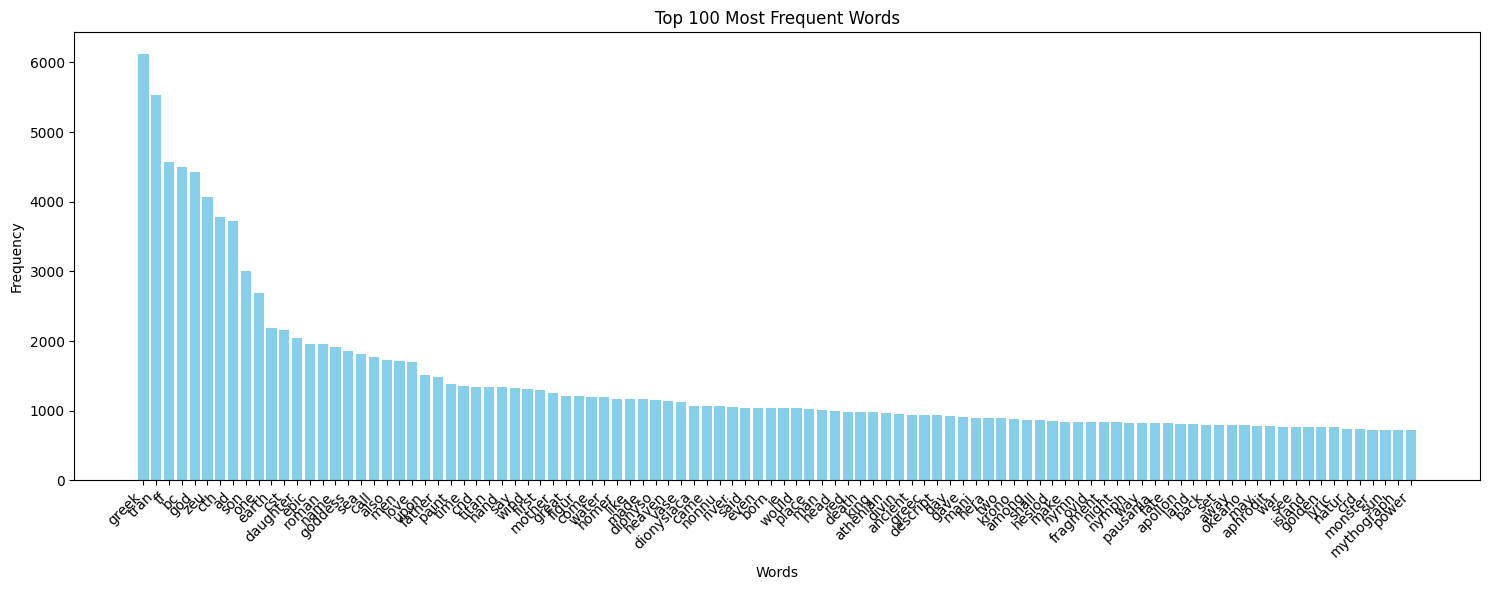

In [18]:
plot_frequencies(stemmed_words)

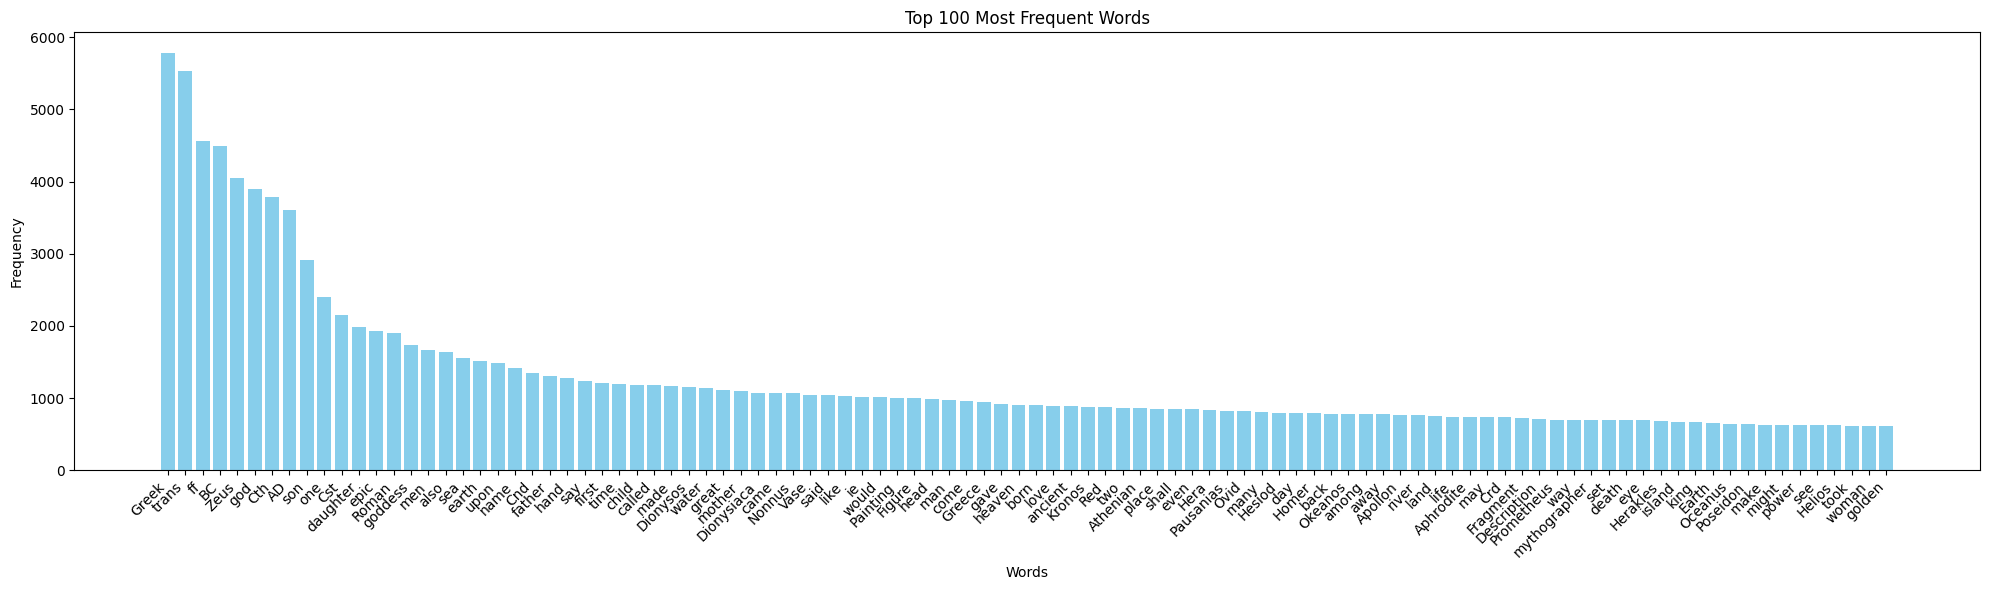

In [20]:
plot_frequencies(lemmatized_words)

In [28]:
# Calculate the length of each sequence
sequence_lengths = [len(seq) for seq in sentences]



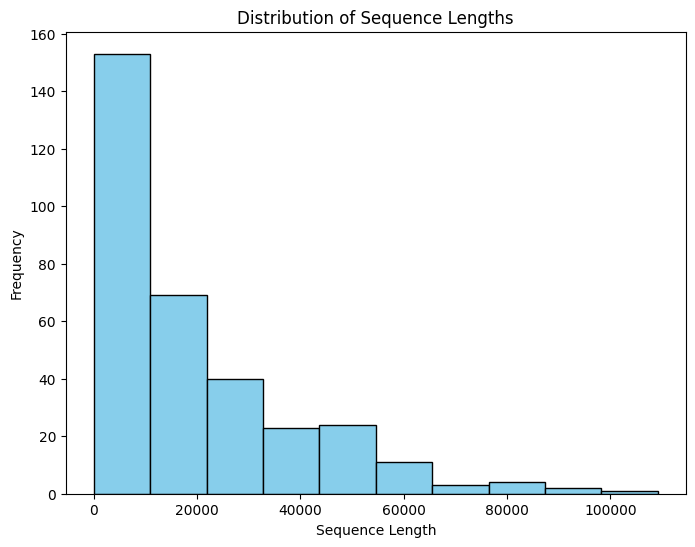

In [31]:
# Plot a histogram of sequence lengths
plt.figure(figsize=(8, 6))
plt.hist(sequence_lengths, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')

# Show the plot
plt.show()

In [37]:
print(f'Average length of sequences : {int(sum(sequence_lengths)/len(sequence_lengths))}')

Average length of sequences : 19848


In [38]:
print(f"No of unique words : {len(set(stemmed_words))}")

No of unique words : 34008


In [39]:
print(f"No of unique words : {len(set(lemmatized_words))}")

No of unique words : 46091


In [36]:
unique_words = set(stemmed_words)  # Find unique words
total_words = len(stemmed_words)   # Count total words
lexical_diversity = len(unique_words) / total_words if total_words > 0 else 0

print(f"Lexical Diversity: {lexical_diversity:.2f}")

Lexical Diversity: 0.05


In [40]:
unique_words = set(lemmatized_words)  # Find unique words
total_words = len(lemmatized_words)   # Count total words
lexical_diversity = len(unique_words) / total_words if total_words > 0 else 0

print(f"Lexical Diversity: {lexical_diversity:.2f}")

Lexical Diversity: 0.07


# Observations

- **Higher Unique Words and Lexical Diversity for Lemmatization:**

  Lemmatization considers grammar and maintains meaningful distinctions, so it retains more unique lemmas compared to the cruder process of stemming.
  Example: Lemmatization would differentiate "better" and "good," but stemming might treat them as the same.
-  **Lower Unique Words and Lexical Diversity for Stemming:**

  Stemming aggressively reduces words without considering their meaning, leading to overgeneralization